# Things to investigate

- Why are the SVD errors so strange 
- Looking into the 2012 dataset 
- something about the lowest SVD errors being of order of the random fluctuations 
- Note when the Earthquakes are 

In [105]:
from scripts import create_design_mat, remove_outliers, load_and_clean, svd_uncertainty

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
from datetime import datetime

date = "04_07"

datetime.strptime(date, "%m_%d").strftime("%dth %b")[1:]

'7th Apr'

### Removing outliers

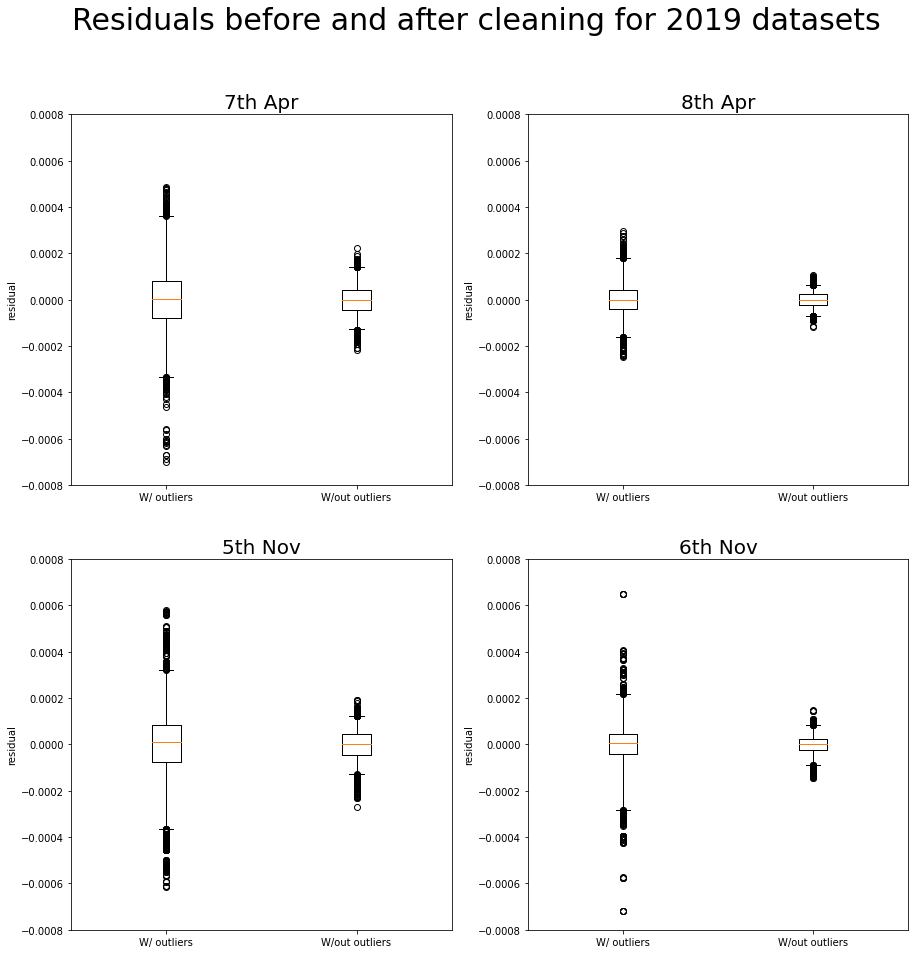

In [124]:
# REMOVE RESIDUALS FOR ALL

dates = ["04_07", "04_08", "11_05", "11_06"]

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle("Residuals before and after cleaning for 2019 datasets", fontsize=30)

j = 0

for i, date in enumerate(dates):

    if i > 1:
        j = 1
        i -= 2

    df = pd.read_csv(f"data/2019_{date}.csv")
    l = []

    design_mat, pinv, y, beta = create_design_mat(df)

    l.append(y - design_mat @ beta)

    df = remove_outliers(y, beta, design_mat, df, 1)

    design_mat, pinv, y, beta = create_design_mat(df)

    l.append(y - design_mat @ beta)
    x = ["with residuals", "without residuals"]

    ax[j, i].boxplot(l, whis=[2.5, 97.5])
    ax[j, i].set_ylim([-0.0008, 0.0008])
    ax[j, i].set_xticklabels(["W/ outliers", "W/out outliers"])
    ax[j, i].set_ylabel("residual")

    date = datetime.strptime(date, "%m_%d").strftime("%dth %b")[1:]

    ax[j, i].set_title(f"{date}", fontsize=20)

# plt.savefig('removing-outliers.png')

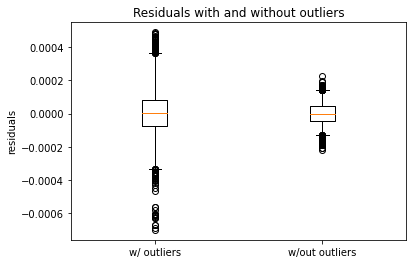

In [74]:
df_04_07 = pd.read_csv("data/2019_04_07.csv")
l = []

design_mat, pinv, y, beta = create_design_mat(df_04_07)

l.append(y - design_mat @ beta)

df_04_07 = remove_outliers(y, beta, design_mat, df_04_07, 1)

design_mat, pinv, y, beta = create_design_mat(df_04_07)

l.append(y - design_mat @ beta)
x = ["with residuals", "without residuals"]

plt.boxplot(l, whis=[2.5, 97.5])
plt.xticks([1, 2], ["w/ outliers", "w/out outliers"])
plt.ylabel("residuals")
plt.title("Residuals with and without outliers")

# where the whiskers are 2.5th and 97.5th percentiles
plt.show()
# plt.savefig('removing-outliers.png', dpi=600)

### Errors between nights 

In [4]:
# load in all the data, clean it, and find the model parameters
design_mat_04_07, pinv_04_07, y_04_07, beta_04_07 = load_and_clean("2019_04_07")
design_mat_04_08, pinv_04_08, y_04_08, beta_04_08 = load_and_clean("2019_04_08")
design_mat_11_05, pinv_11_05, y_11_05, beta_11_05 = load_and_clean("2019_11_05")
design_mat_11_06, pinv_11_06, y_11_06, beta_11_06 = load_and_clean("2019_11_06")

We have the formula below and know that $\sigma_d$ can be found from $\chi^2$ equation

$$\sigma^2(\theta_j) = \sum_i \left ( \frac{V_{ji}}{w_i} \right )^2 \sigma^2_d$$

$$\chi^2(\theta_i) = \sum_{i=1}^{N-1} \frac{(y_i - f(\theta_i))^2}{\sigma_d^2}$$

Here we say that for large datasets $\sigma_d$ is the same for all delay measures and $\chi^2$ is equal to the number of degrees of freedom which is $N - M$

In [5]:
error_04_07 = svd_uncertainty(design_mat_04_07, y_04_07, beta_04_07)
error_04_08 = svd_uncertainty(design_mat_04_08, y_04_08, beta_04_08)
error_11_05 = svd_uncertainty(design_mat_11_05, y_11_05, beta_11_05)
error_11_06 = svd_uncertainty(design_mat_11_06, y_11_06, beta_11_06)

In [8]:
error_04_07

kamil_errors = np.array(
    [
        0.002154,
        0.004273,
        0.003113,
        0.000075,
        0.000106,
        0.000254,
        0.000064,
        0.000083,
        0.000195,
        0.000086,
        0.000082,
        0.000228,
        0.000077,
        0.000083,
        0.000228,
    ]
)

error_04_07[:15] / kamil_errors

array([2.20767780e-02, 1.67278252e-02, 3.67281764e-02, 1.76438293e+00,
       1.69621563e+00, 4.49263514e-01, 4.17538863e+00, 8.36708721e+00,
       4.23878033e+00, 6.13383385e+00, 5.27695765e+00, 3.98132945e+00,
       9.00295950e+00, 1.91300296e+01, 9.09775181e+00])

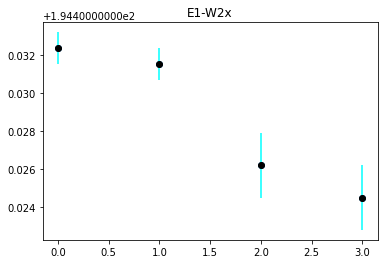

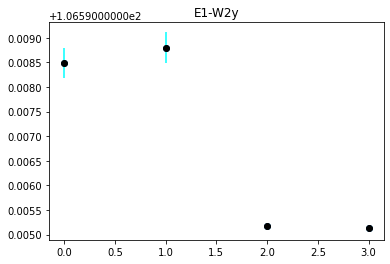

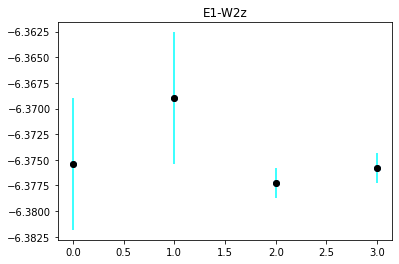

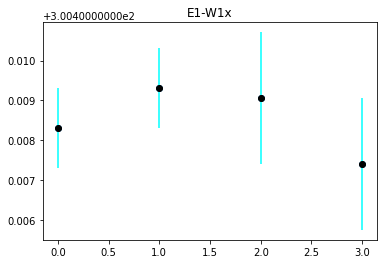

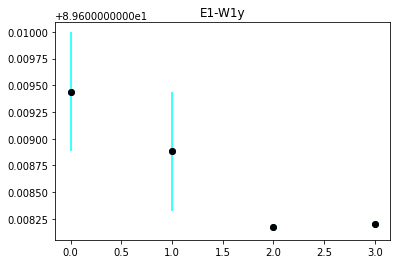

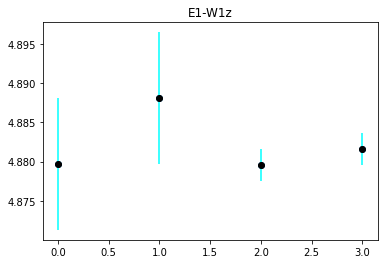

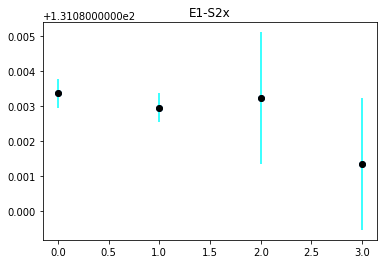

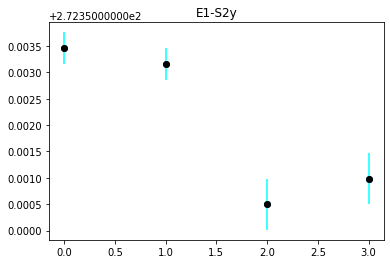

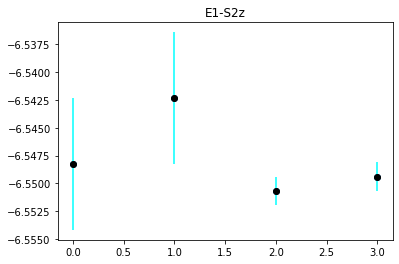

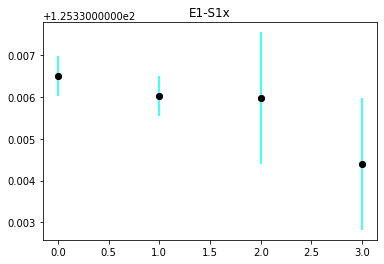

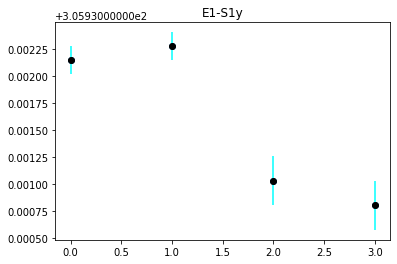

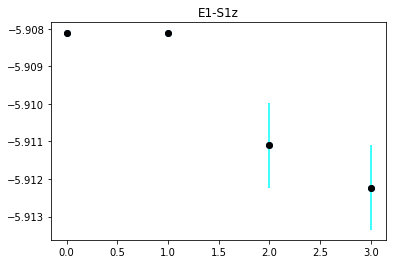

In [9]:
telescopes = [
    "W2x",
    "W2y",
    "W2z",
    "W1x",
    "W1y",
    "W1z",
    "S2x",
    "S2y",
    "S2z",
    "S1x",
    "S1y",
    "S1z",
]

# Define Data

for i, telescope in enumerate(telescopes):

    x = np.arange(0, 4)
    y = [beta_04_07[i], beta_04_08[i], beta_11_05[i], beta_11_06[i]]

    # Define Error
    # import pdb; pdb.set_trace()
    apr_error = abs(beta_04_07[i] - beta_04_08[i])
    nov_error = abs(beta_11_05[i] - beta_11_06[i])

    y_error = [apr_error, apr_error, nov_error, nov_error]

    # y_error = 100* np.array([error_04_07[0], error_04_08[0], error_11_05[0], error_11_06[0]])

    # Plot Scatter Plot

    plt.scatter(x, y)

    # Plot error bar

    plt.errorbar(x, y, yerr=y_error, fmt="o", ecolor="cyan", color="black")

    # Display graph
    plt.title(f"E1-{telescope}")

    plt.show()

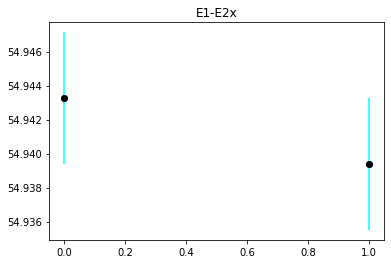

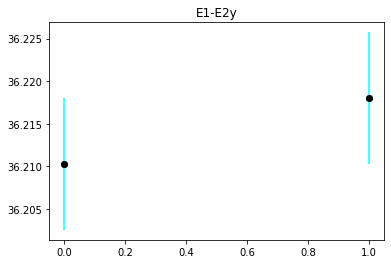

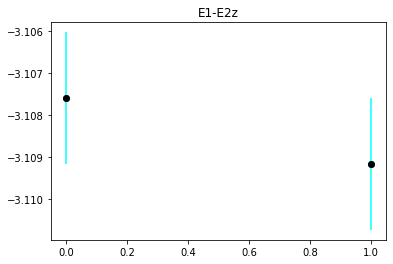

In [10]:
telescopes = ["E2x", "E2y", "E2z"]

# Define Data

for i, telescope in enumerate(telescopes):

    x = np.arange(0, 2)
    y = [beta_04_07[i + 12], beta_04_08[i + 12]]

    # Define Error

    apr_error = abs(beta_04_07[i + 12] - beta_04_08[i + 12])

    y_error = apr_error

    # y_error = 100* np.array([error_04_07[0], error_04_08[0], error_11_05[0], error_11_06[0]])

    # Plot Scatter Plot
    plt.scatter(x, y)

    # Plot error bar

    plt.errorbar(x, y, yerr=y_error, fmt="o", ecolor="cyan", color="black")

    # Display graph
    plt.title(f"E1-{telescope}")

    plt.show()

In [11]:
# here is the comparitive size of the two uncertainties... certaintly very different
(beta_04_07[:15] - beta_04_08[:15]) / error_04_07[:15]

array([ 1.75787384e+01, -4.36271287e+00, -5.62138117e+01, -7.58821167e+00,
        3.09885671e+00, -7.35312513e+01,  1.51658886e+00,  4.37147723e-01,
       -7.15141986e+00,  9.10296755e-01, -2.95533654e-01,  1.21042186e-02,
        5.59029190e+00, -4.86635447e+00,  7.57656955e-01])

### Now look at the 2012 data set and try and do the same kind of analysis

First, it is good to have a look at the dataset

In [12]:
df_2012 = pd.read_csv("data/2012_all_v2.csv")

df_2012.head()

,Unnamed: 0,utc,star,elevation,azimuth,tel_1,tel_2,pop_1,pop_2,cart_1,cart_2
0,0,2012-02-03T02:25:39.000,#57100,0.713447,2.464114,S1,W1,P4B5,P1B6,87.558149,23.999987
1,1,2012-02-03T02:25:40.000,#57100,0.713485,2.464196,S1,W1,P4B5,P1B6,87.551523,23.999987
2,2,2012-02-03T02:25:41.000,#57100,0.713523,2.464278,S1,W1,P4B5,P1B6,87.544909,23.999987
3,3,2012-02-03T02:46:21.000,#57100,0.757257,2.570060,S1,W1,P4B5,P1B6,78.534254,23.999992
4,4,2012-02-03T02:46:39.000,#57100,0.757843,2.571662,S1,W1,P4B5,P1B6,78.391951,23.999992


In [14]:
# first it is a good idea to have a look at the distribution throughout the year
from collections import Counter

months = [dates[5:7] for dates in df_2012.utc.values]

# so we see there are very few values when compared to 2019 dataset
Counter(months)

Counter({'02': 129,
         '04': 2096,
         '05': 911,
         '06': 2288,
         '07': 2423,
         '08': 4239,
         '09': 3414,
         '10': 3536,
         '11': 2473,
         '12': 766})

In [16]:
# also may be a good idea to look at the number for each day in each month
# number of days in ea. month feb thru dec
np.array(
    list(
        Counter(
            [
                dates[8:10]
                for dates in df_2012[
                    np.where(np.array(months) == "04", 1, 0) == 1
                ].utc.values
            ]
        ).items()
    )
)

array([['03', '160'],
       ['09', '176'],
       ['10', '167'],
       ['17', '50'],
       ['18', '77'],
       ['20', '332'],
       ['21', '470'],
       ['22', '335'],
       ['23', '53'],
       ['28', '186'],
       ['30', '90']], dtype='<U21')

# Time Complexity 

In [32]:
%timeit -r10 -n10 np.linalg.svd(design_mat_04_07)
%timeit -r10 -n10 np.linalg.svd(design_mat_04_08)
%timeit -r10 -n10 np.linalg.svd(design_mat_11_05)
%timeit -r10 -n10 np.linalg.svd(design_mat_11_06)

121 ms ± 5.35 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
265 ms ± 4.78 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
806 ms ± 40.6 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
485 ms ± 16.8 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [54]:
shapes = [
    design_mat_04_07.shape,
    design_mat_04_08.shape,
    design_mat_11_05.shape,
    design_mat_11_06.shape,
]

time_complexities = np.array([shape[0] ** 2 * shape[1] for shape in shapes])
times = np.array([121, 265, 806, 485])
times_err = np.array([5.35, 4.78, 40.6, 16.8])
a, b = np.polyfit(time_complexities, times, 1)

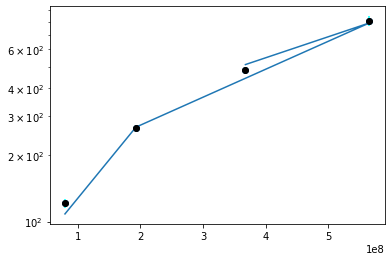

In [55]:
plt.scatter(time_complexities, times)
plt.yscale("log")
plt.errorbar(
    time_complexities, times, yerr=times_err, fmt="o", ecolor="cyan", color="black"
)
plt.plot(time_complexities, a * time_complexities + b)

In [35]:
design_mat_11_06.shape

(2563, 56)

### Parts of the sky sampled 

/var/folders/yr/nz2d8_8n42g11zxgd7yjxhq40000gn/T/ipykernel_5345/2795258100.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


NameError: name 'S' is not defined

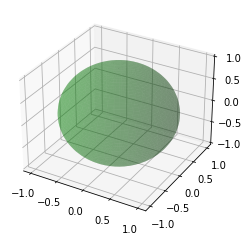

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection="3d")

# draw sphere
u, v = np.mgrid[0 : 2 * np.pi : 50j, 0 : np.pi : 50j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="g", alpha=0.3)


# a random array of 3D coordinates in [-1,1]
# need the S_vector in here...

# tails of the arrows
tails = np.zeros(len(bvecs))

# heads of the arrows with adjusted arrow head length
ax.quiver(
    tails,
    tails,
    tails,
    bvecs[:, 0],
    bvecs[:, 1],
    bvecs[:, 2],
    length=1.0,
    normalize=True,
    color="r",
    arrow_length_ratio=0.15,
)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.set_title("b-vectors on unit sphere")

plt.show()

In [129]:
# degenerate data in 2012
telescope = "W2"

pop_tel_1 = df[df.tel_1 == telescope].pop_1
pop_tel_2 = df[df.tel_2 == telescope].pop_2
tel_1_unique_pops = np.unique(pop_tel_2)
tel_2_unique_pops = np.unique(pop_tel_1)
tel_unique_pops = np.union1d(tel_1_unique_pops, tel_2_unique_pops)
# tot_unique_pops.append(tel_unique_pops)

In [130]:
tel_unique_pops

array(['P5B1', 'P5B2', 'P5B3', 'P5B4', 'P5B5', 'P5B6'], dtype=object)